<a href="https://colab.research.google.com/github/maryamagahi/Playground/blob/main/Food%20Hub%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science/Notebooks/Raw Data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has **9 columns** as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

#### Observations:
The dataset includes **1898 rows and 9 columns**.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are **3 datatypes** in the dataset:
*   **4 coloumns** are **int64** that represent numerical variables in integer format (order_id, customer_id, food_preparation_time, and delivery_time)
*   **4 coloumns** are **object** that represent categorical variables (resturant_name, cuisine_type, day_of_the_week, and rating)
*   **one coloumn** is **float64** which is a numerical variable that accepts decimals (cost_of_the_order)






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is **no missing values** in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

food_preparation_time is ranging from **20 - 35 minutes** and the average time is **~27.38 minutes**.


### **Question 5:** How many orders are not rated?

In [ ]:
df[df['rating']=='Not given']['order_id'].count()

736

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
**736 orders** are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### 6.1. Order ID
**Observations:** The number of unique order IDs is **1898** which is equal to count of values for this coloumn, hence there is no duplicate row in the dataset.

In [ ]:
df['order_id'].nunique()

1898

#### 6.2. Customer ID
**Observations:** The number of unique Customer IDs is **1200** which means some customers ordered multiple times. The customer with most number of orders is **ID=52832** with **13 orders**.

In [ ]:
df['customer_id'].nunique()

1200

In [ ]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### 6.3. Restaurant Name

**Observations:** The number of unique restaurant name is **178**. The restaurant with most number of recieved orders is **Shake Shack** with **219 orders**.

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### 6.4.Cuisine Type
**Observations:** The number of unique cuisine type is **14**. The cuisine type with most orders is **American** with **584 orders**. Japanese, Italian & Chinese are the next to follow.

In [ ]:
df['cuisine_type'].nunique()

14

In [ ]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

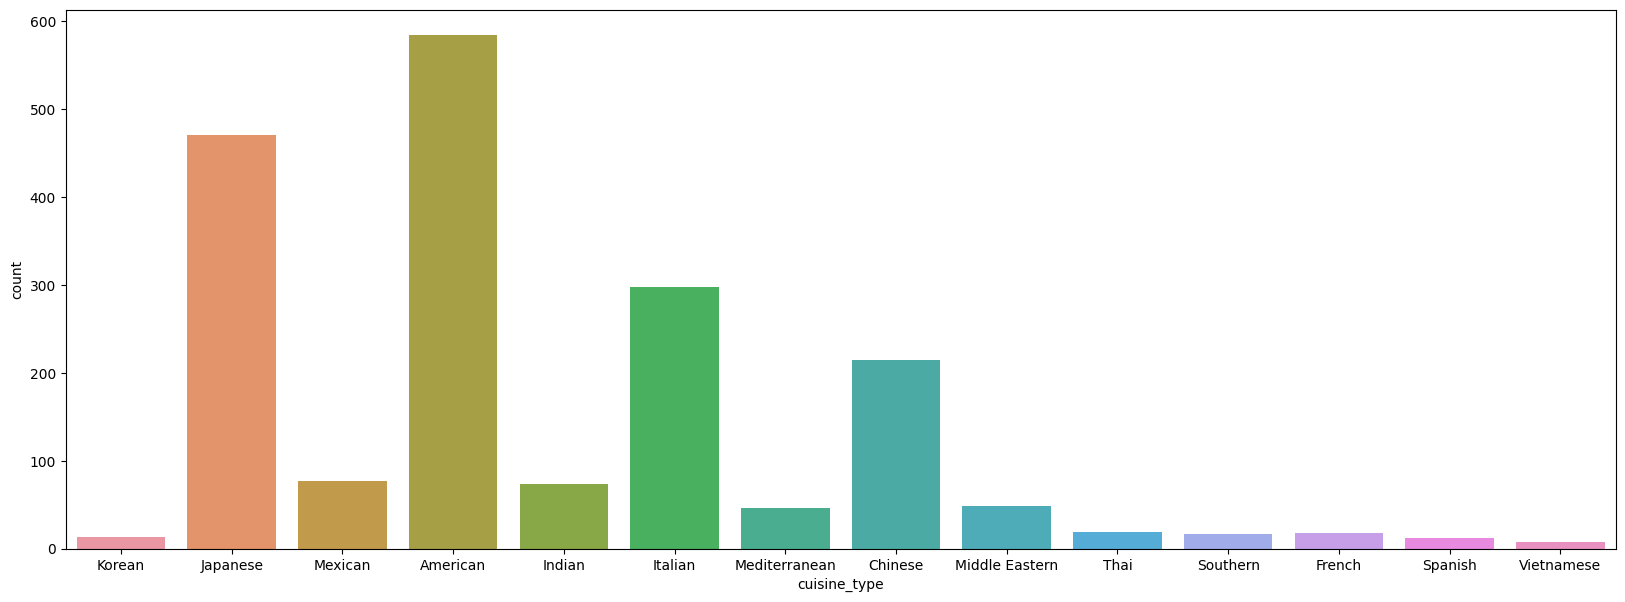

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type');

#### 6.5. Cost of the order

**Observations:** The distribution of order cost is slightly **right-skewed** with **more than 75% of orders** costing less than $25.

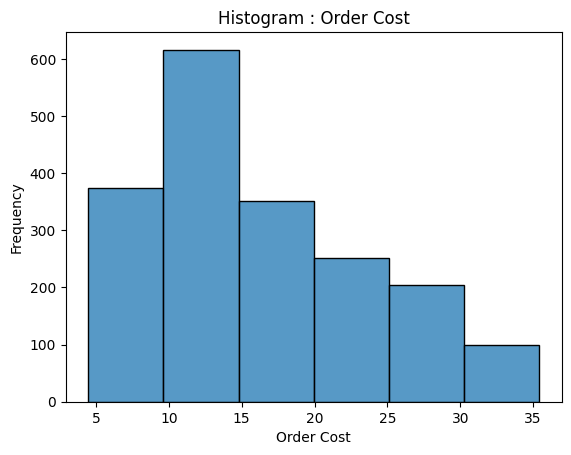

In [ ]:
plt.title('Histogram : Order Cost')
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order', bins=6);

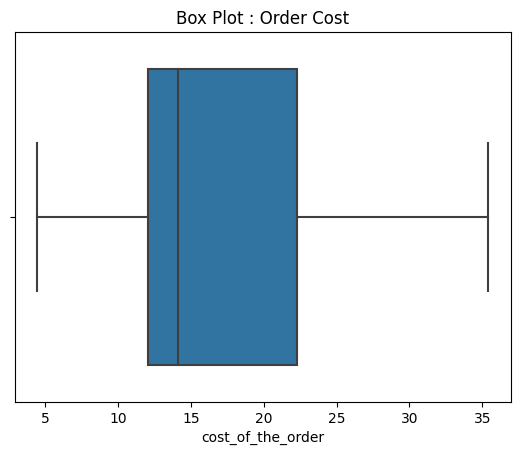

In [ ]:
plt.title('Box Plot : Order Cost')
plt.xlabel('Order Cost')
sns.boxplot(data=df, x='cost_of_the_order');

#### 6.6. Day of the week
**Observations:** day of the week has **2** values: Weekends and Weekdays. **More than 1300** of orders were placed in **Weekends**.

In [ ]:
df['day_of_the_week'].nunique()

2

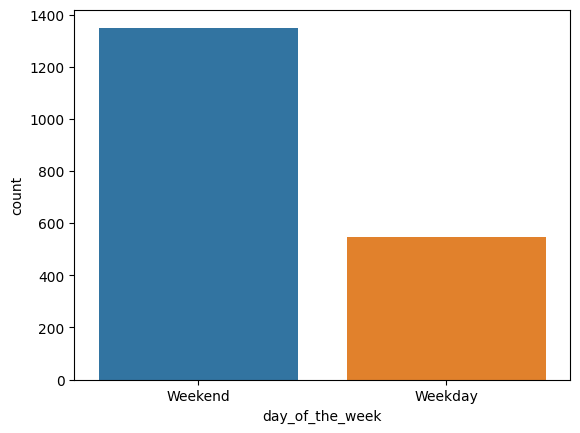

In [ ]:
sns.countplot(data=df, x='day_of_the_week');

#### 6.7. Rating
**Observations:** day of the week takes has **4** unique values: 3,4,5 and Not given. **More than 700** of orders were **not given** a rating. **~600** of orders got rating of 5, **~400** of them got rating of 4 and the rest(**~200**) got rating of 3.

In [ ]:
df['rating'].nunique()

4

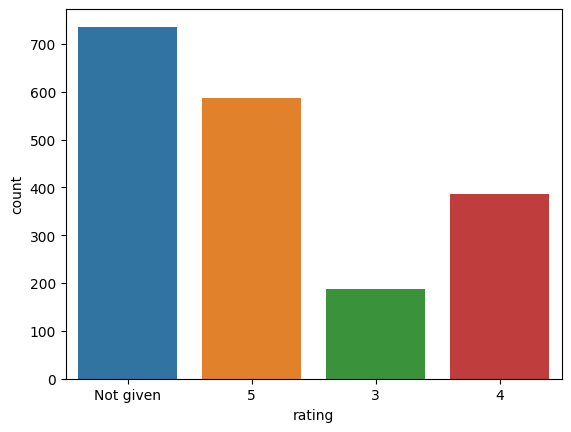

In [ ]:
sns.countplot(data=df, x='rating');

#### 6.8. Food Prepration Time

**Observations:** The distribution of food preperation time **is mostly uniformly distributed** with exception of slightly higher number of orders for 32 minutes and above bin. The box plot also shows a **quite even split across quantile.**

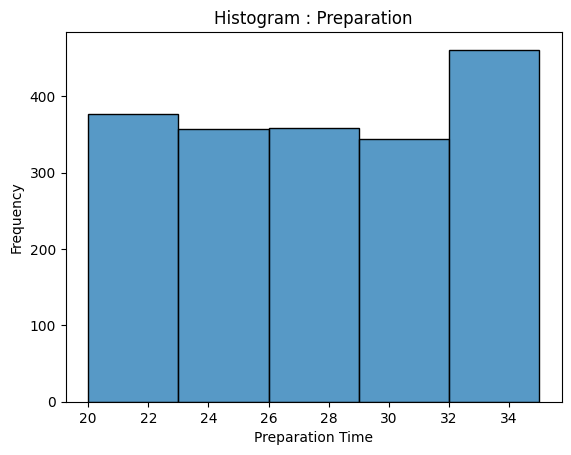

In [ ]:
plt.title('Histogram : Preparation')
plt.xlabel('Preparation Time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time', bins=5);

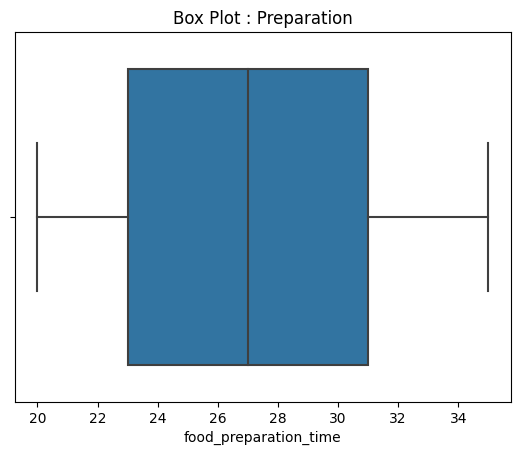

In [ ]:
plt.title('Box Plot : Preparation')
sns.boxplot(data=df, x='food_preparation_time');

#### 6.9. Food Delivery Time

**Observations:** The distribution of delivery time is **leftt-skewed** with **more than 50% of orders** take **more the 25 minutes** to deliver.

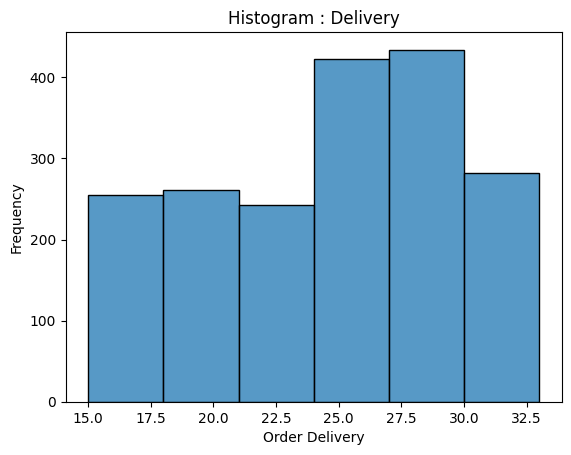

In [ ]:
plt.title('Histogram : Delivery')
plt.xlabel('Order Delivery')
plt.ylabel('Frequency')
sns.histplot(data=df, x='delivery_time', bins=6);

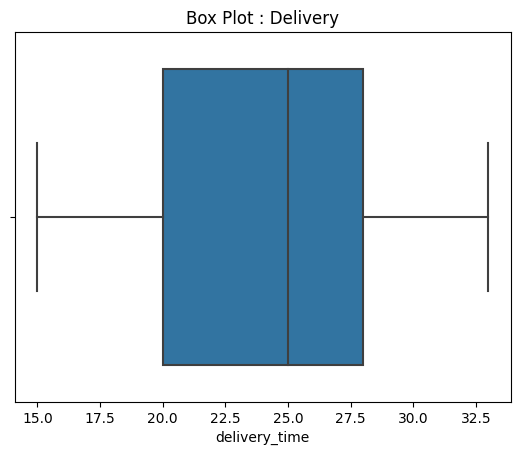

In [ ]:
plt.title('Box Plot : Delivery')
sns.boxplot(data=df, x='delivery_time');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts().head()
# OR
# df.groupby('restaurant_name')['order_id'].count().to_frame().reset_index().sort_values(by= 'order_id',ascending=False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 restaurants are:
1. Shake Shack with **219** orders
2. The meatball Shop with **132** orders
3. Blue Ribbon Sushi with **119** orders
4. Blue Ribbon Fried Chicken with **96** orders
5. Parm with **68** orders



### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

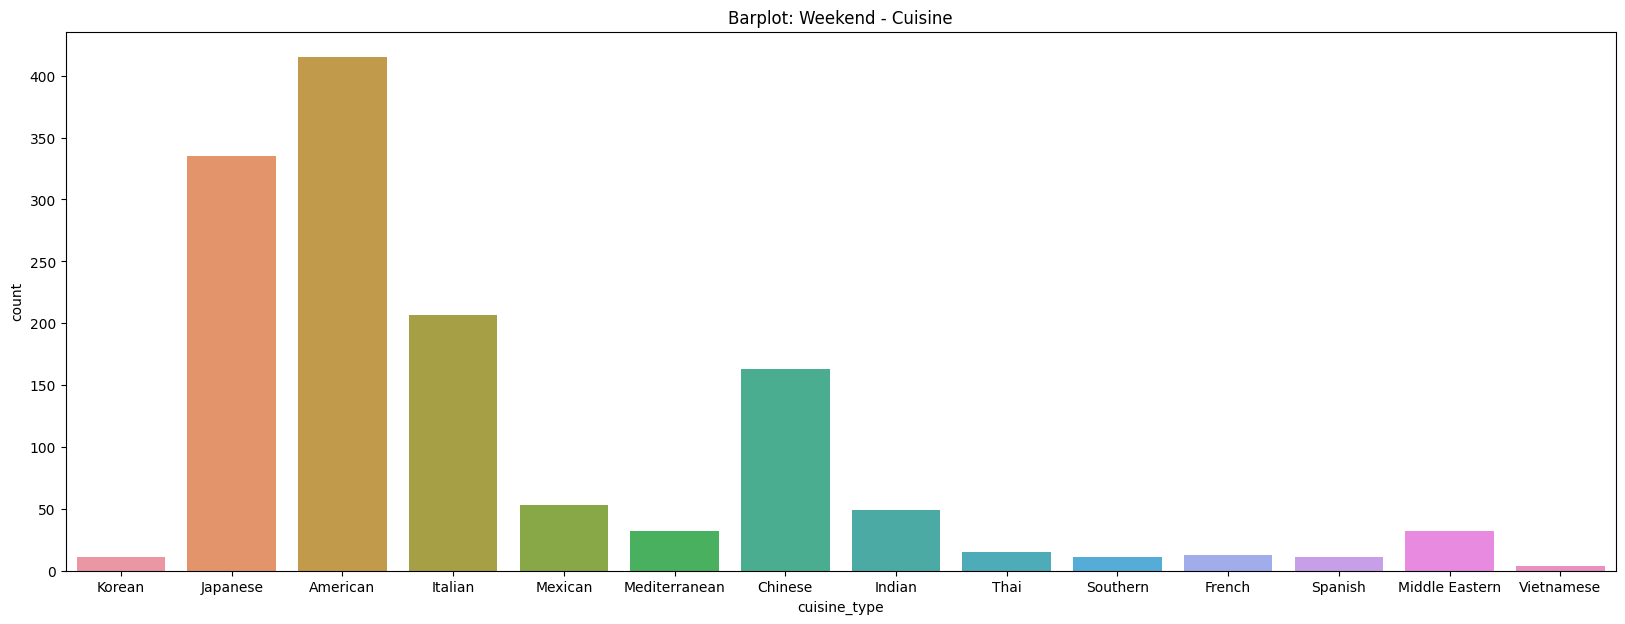

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Barplot: Weekend - Cuisine')
sns.countplot(data=df[df['day_of_the_week']=='Weekend'], x='cuisine_type')
plt.show()

#### Observations:
The most popular cuisine on weekends is **American**.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
df_greater_than_20_ratio = df[df['cost_of_the_order']>20]['order_id'].nunique()/df['order_id'].nunique()
percentage = df_greater_than_20_ratio * 100
print(round(percentage,2),"%")

29.24 %


#### Observations:
**29.24% of orders** cost more than $20.

### **Question 10**: What is the mean order delivery time?

In [ ]:
round(df['delivery_time'].mean(),2)

24.16

#### Observations: The mean order delivery time is **24.16 minutes**.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
the top 3 customers ID are:
1. 52832 with **13 orders**
2. 47440 with **10 orders**
3. 83287 with **9 orders**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### 12.1. Numerical Variables Relationship
**Observations** Numerical variables are independent from each other.

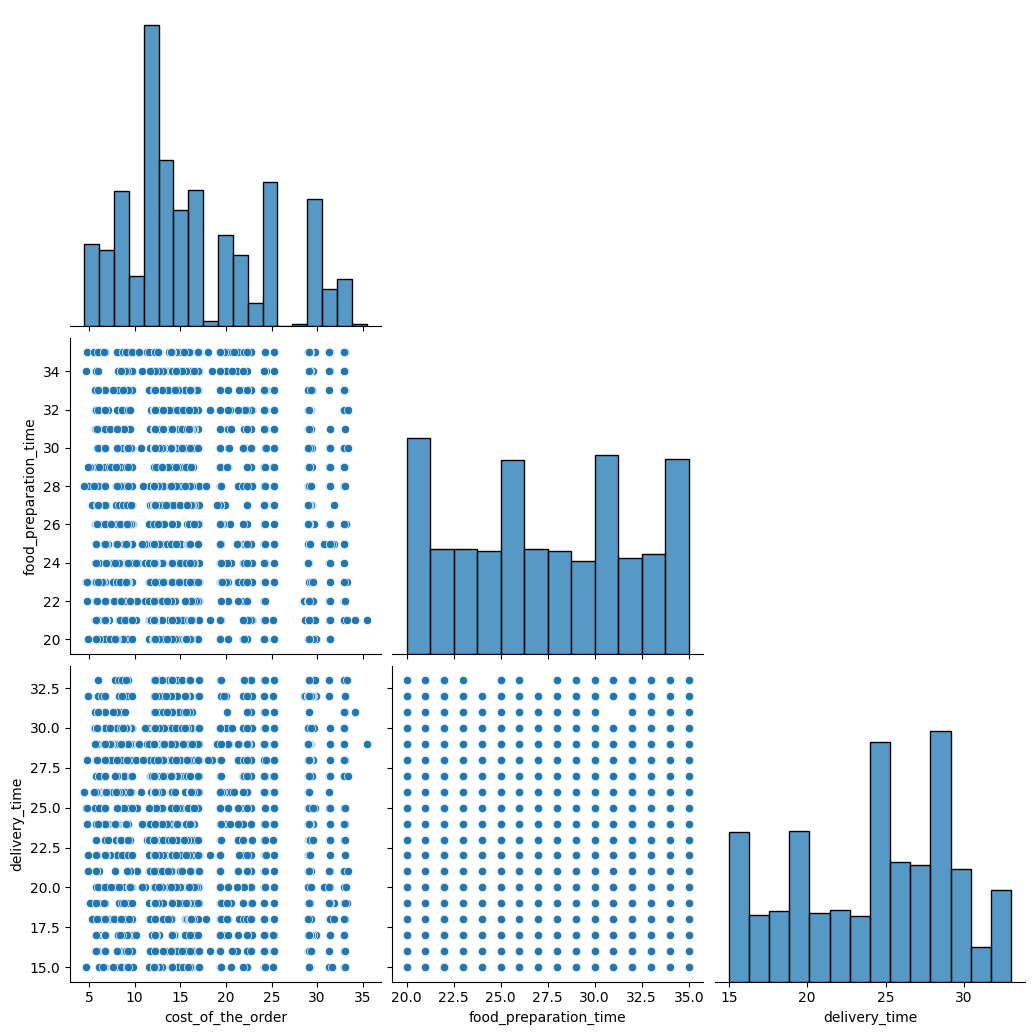

In [ ]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']], height=3.5, corner=True)
plt.show()

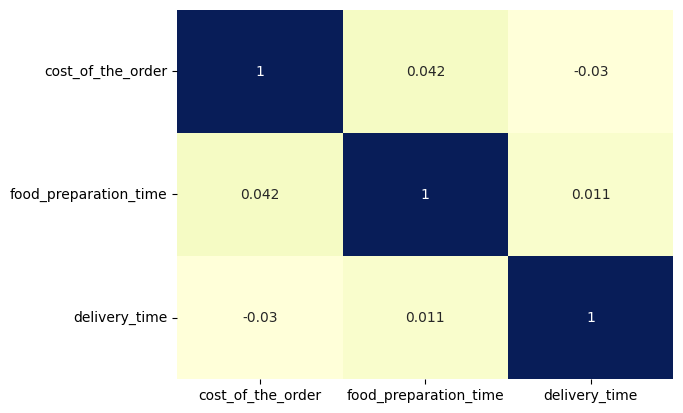

In [ ]:
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cbar=False, cmap='YlGnBu');

#### 12.3. Numerical - Categorical Variables Relationship

1. Cost of Order varies by cusinie_type both in terms of range of cost as well as distribution of cost.
2. Food preparation time varies by by cusinie_type more significantly on distribution of time.
3. delivery time varies by day of the week mostly in terms of range of time. (weekdays have higher delivery time).
4. delivery time also varies by cusisine_type in distribution as well as range.
5.

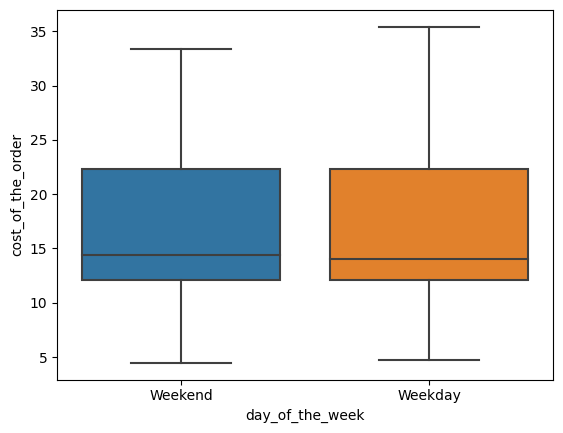

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order') ;

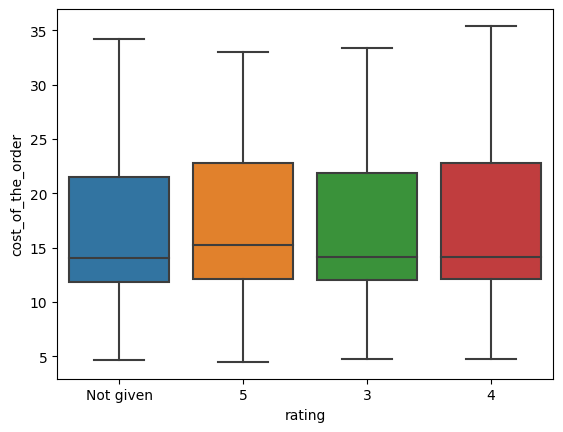

In [ ]:
sns.boxplot(data=df, x='rating', y='cost_of_the_order')
plt.show()

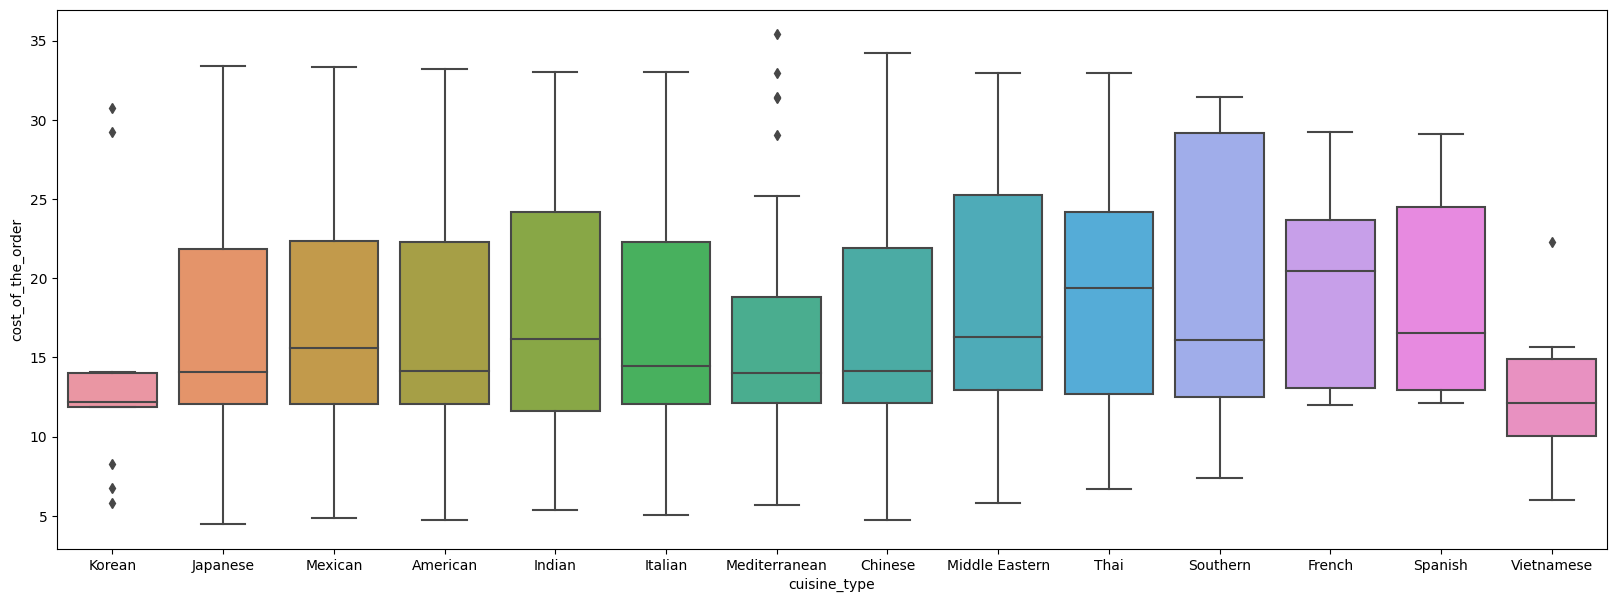

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.show()

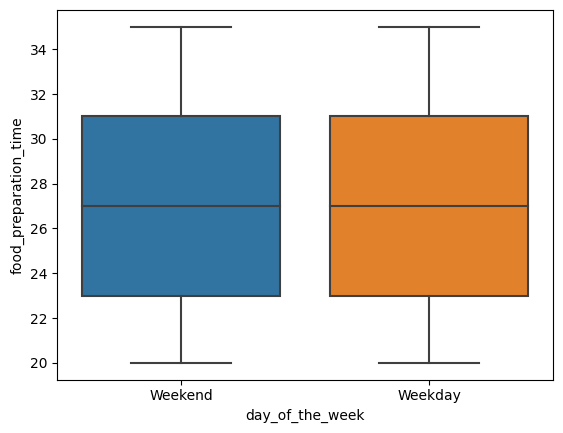

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time') ;

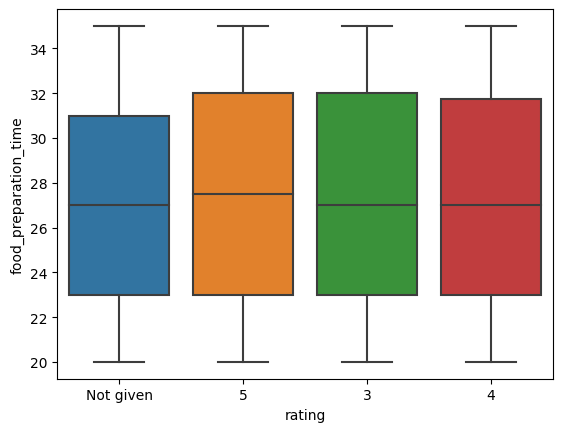

In [ ]:
sns.boxplot(data=df, x='rating', y='food_preparation_time')
plt.show()

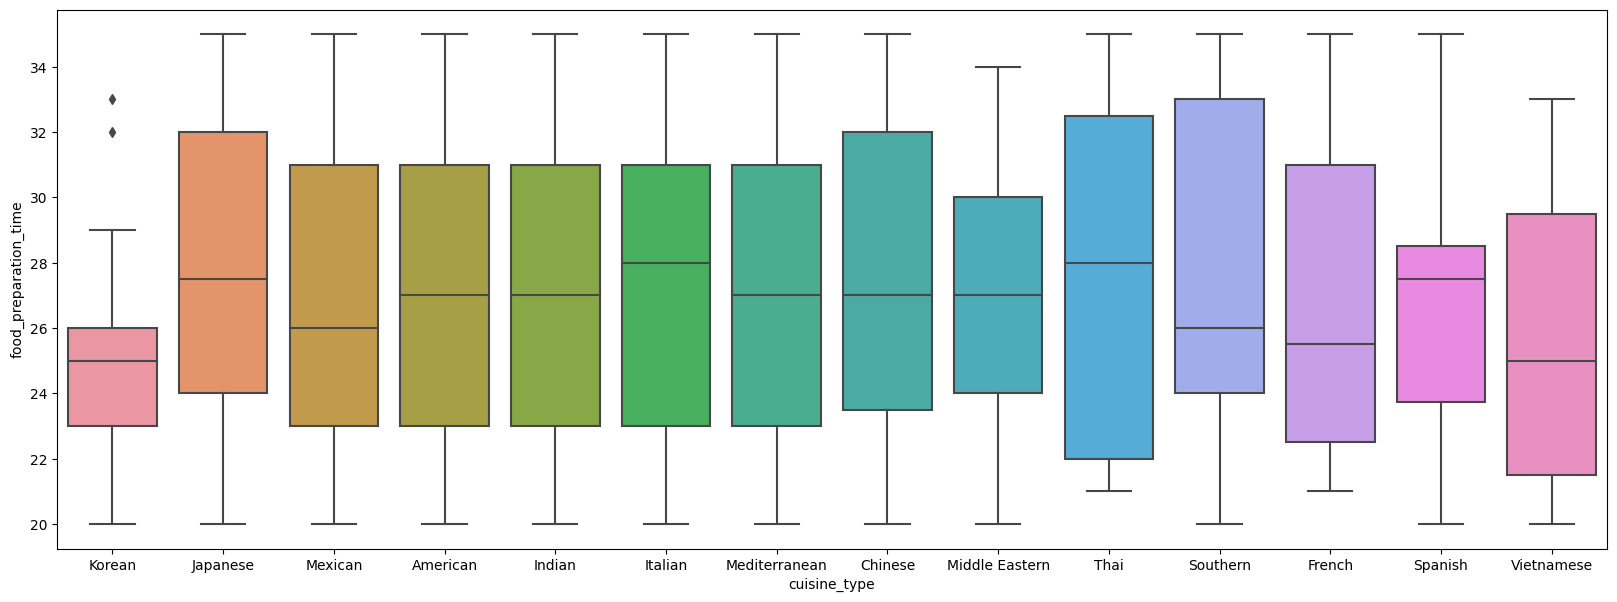

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.show()

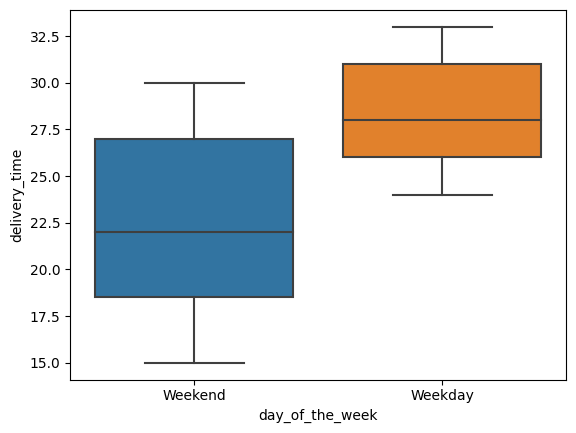

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

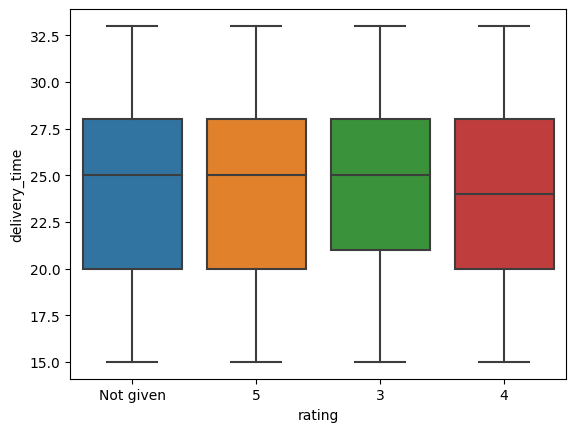

In [ ]:
sns.boxplot(data=df, x='rating', y='delivery_time')
plt.show()

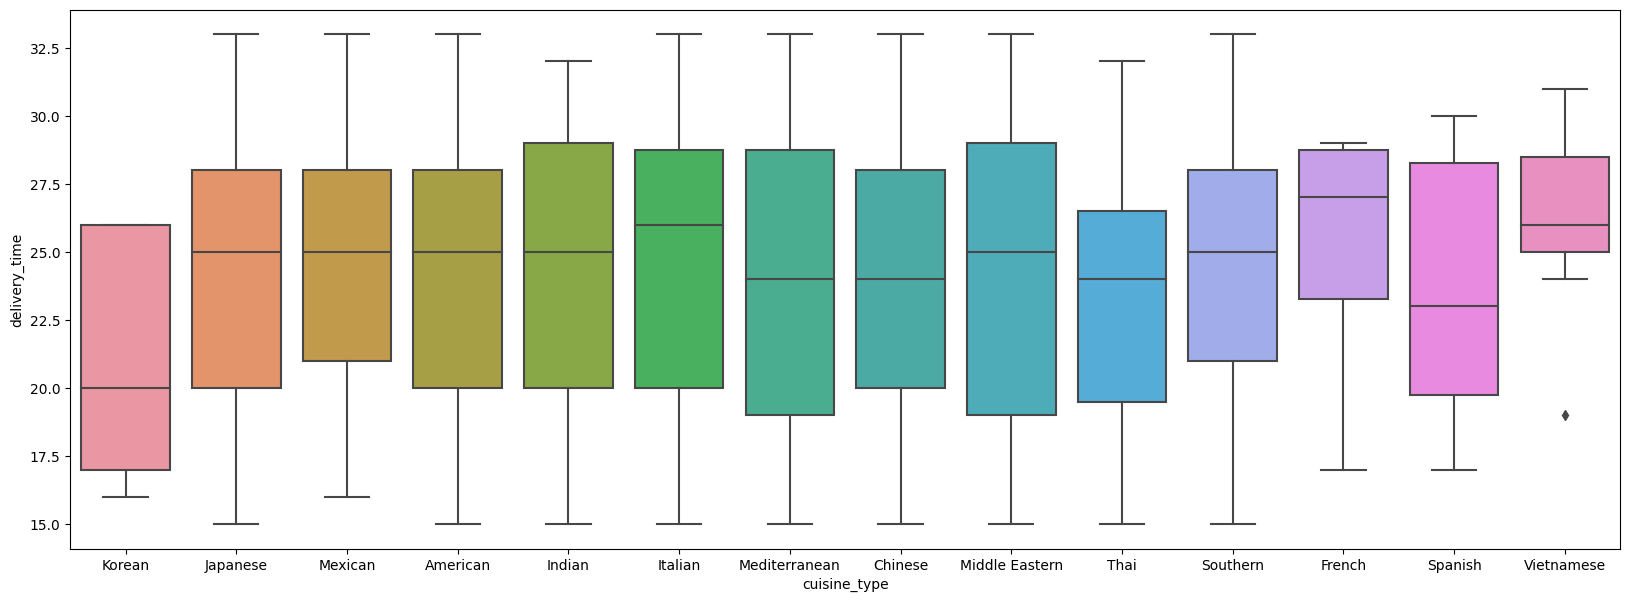

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
df_rated = df[df['rating']!='Not given'].copy()
df_rated['rating']=df_rated['rating'].astype(int)
df_rating_count = df_rated.groupby('restaurant_name')['rating'].count().to_frame().reset_index().sort_values(by= 'rating',ascending=False)
df_rating_count.head(10)

,restaurant_name,rating
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64
104,RedFarm Broadway,41
94,Parm,39
105,RedFarm Hudson,34
125,TAO,28
106,Rubirosa,24
88,Nobu Next Door,23


In [ ]:
df_over50 = df_rating_count[df_rating_count['rating']>50]
df_over50

,restaurant_name,rating
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64


In [ ]:
df_final = pd.merge(df_over50, df_rated, on='restaurant_name', how='inner')
df_final

,restaurant_name,rating_x,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating_y,food_preparation_time,delivery_time
0,Shake Shack,133,1477414,66222,American,16.20,Weekend,5,33,25
1,Shake Shack,133,1478287,150599,American,29.10,Weekday,5,21,30
2,Shake Shack,133,1476651,58092,American,8.00,Weekend,5,27,23
3,Shake Shack,133,1477975,56722,American,9.75,Weekend,5,33,25
4,Shake Shack,133,1477790,133617,American,4.75,Weekday,4,35,28
...,...,...,...,...,...,...,...,...,...,...
349,Blue Ribbon Fried Chicken,64,1477742,338599,American,6.84,Weekend,3,24,26
350,Blue Ribbon Fried Chicken,64,1477664,47440,American,29.30,Weekend,4,28,16
351,Blue Ribbon Fried Chicken,64,1476745,377771,American,12.61,Weekend,3,30,30
352,Blue Ribbon Fried Chicken,64,1478285,113817,American,12.18,Weekend,4,32,22


In [ ]:
df_final.groupby('restaurant_name')['rating_y'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating_y, dtype: float64

#### Observations:

Four Restraurants meet the promotional offer criteria:
1. **Blue Ribbon Sushi** with average rating of **4.2**
2. **Shake Shack** with average rating of **4.2**
3. **Blue Ribbon** Fried Chicken with average rating of **4.3**
4. **The Meatball Shop** with average rating of **4.5**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
def Revenue(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(Revenue)
print('Total Revenue is equal to $',round(df['Revenue'].sum(),2))




Total Revenue is equal to $ 6166.3


#### Observations:
Total revenue for company is **$6,166.30**.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60_ratio = df [df['total_time']>60]['order_id'].nunique()/df['order_id'].nunique()
percentage = df_greater_than_60_ratio * 100
print(round(percentage,2),"%")

10.54 %


#### Observations:

**10.54 %** of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
df_weekdays = df[df['day_of_the_week']=='Weekday']
round(df_weekdays['delivery_time'].mean(),0)

28.0

In [ ]:
df_weekend = df[df['day_of_the_week']=='Weekend']
round(df_weekend['delivery_time'].mean(),0)

22.0

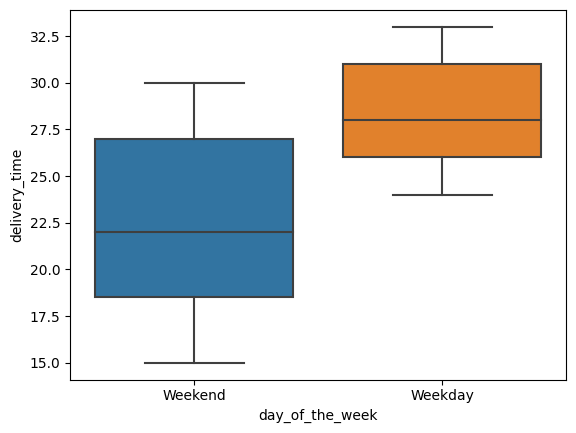

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

#### Observations:
The box plot in question 12 showed that the delivery time varies for Weekend vs Weekdays. Calculating the mean for each group shows that **the average delivery time in Weekends(22 min) is lower than Weekdays(28 min)**.  

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

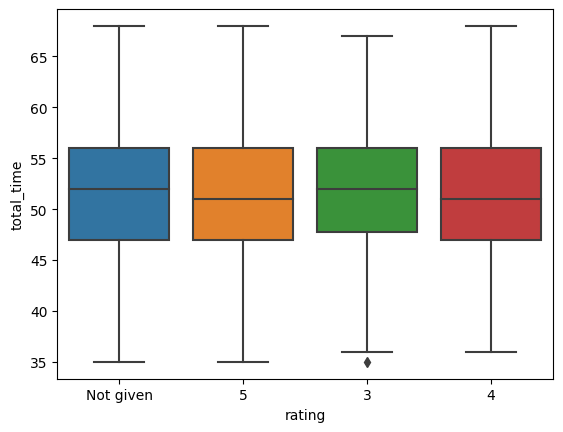

In [ ]:
sns.boxplot(data=df, x='rating', y='total_time')
plt.show()

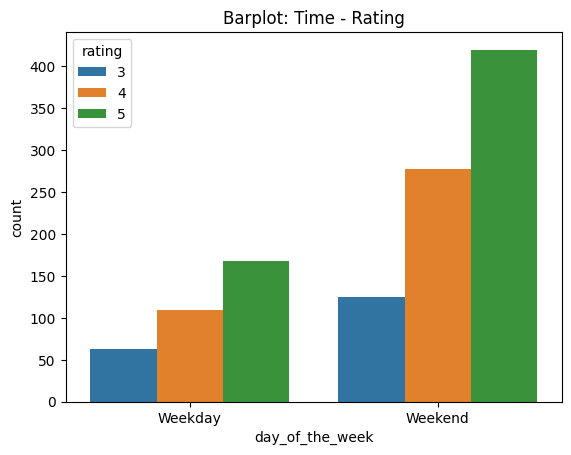

In [ ]:
plt.title('Barplot: Time - Rating')
sns.countplot(data=df_rated, x='day_of_the_week',hue='rating')
plt.show()

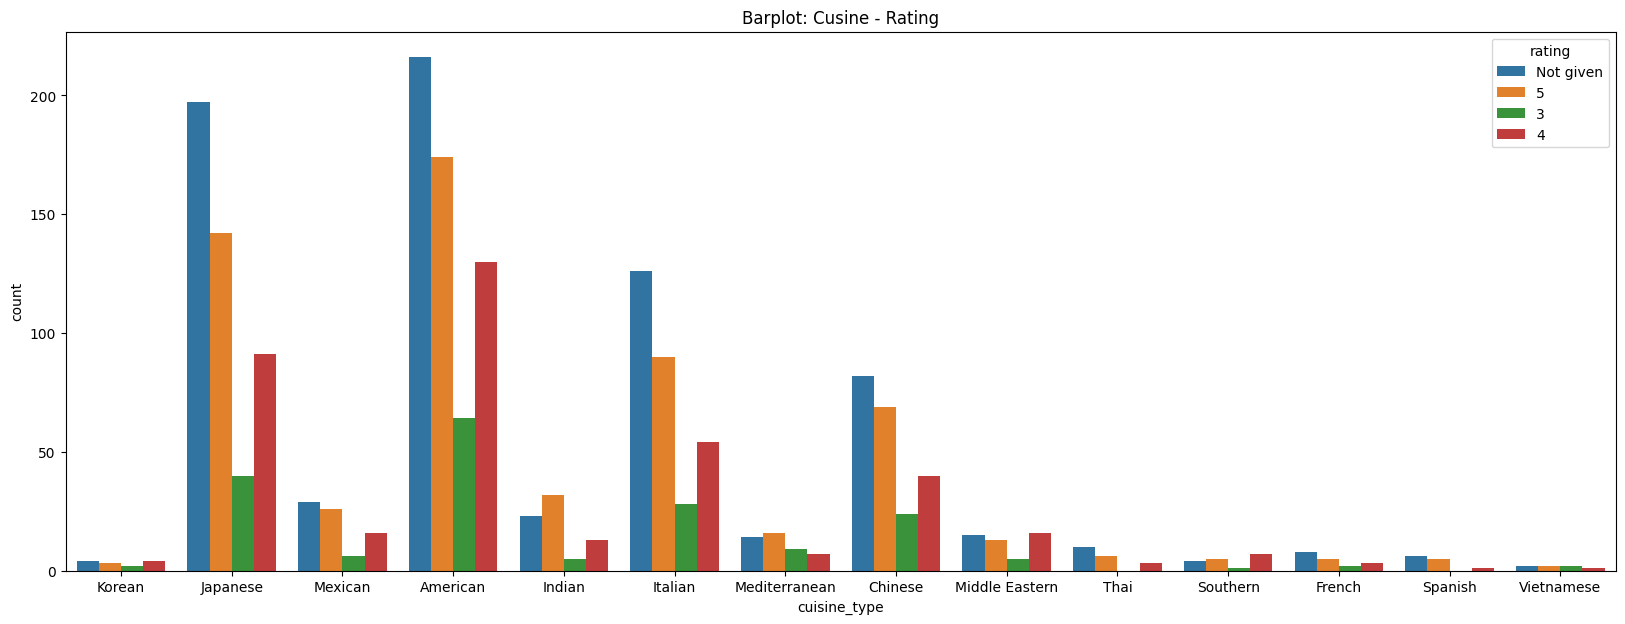

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Barplot: Cusine - Rating')
sns.countplot(data=df, x='cuisine_type',hue='rating')
plt.show()

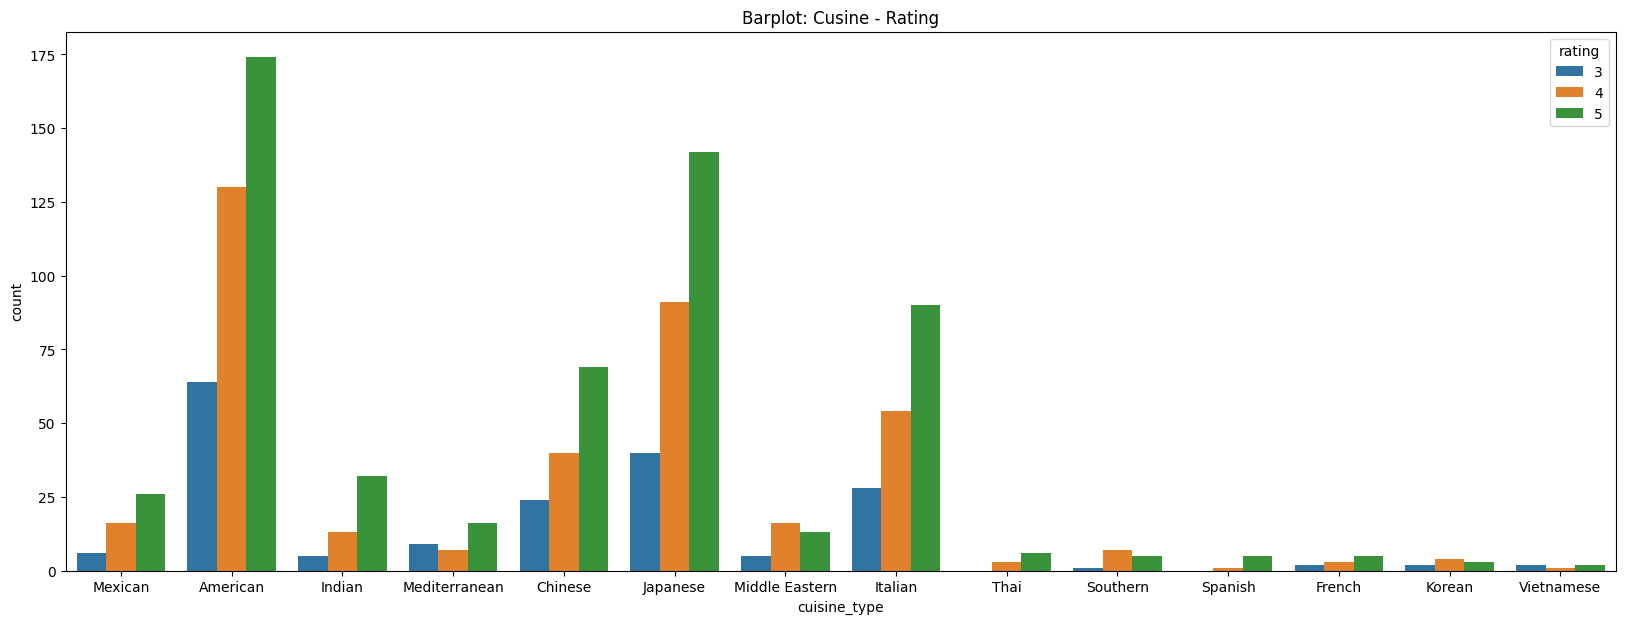

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Barplot: Cusine - Rating')
sns.countplot(data=df_rated, x='cuisine_type',hue='rating')
plt.show()

In [ ]:
df1 = df_rated.groupby('cuisine_type')['rating'].mean().to_frame().reset_index().sort_values(by= 'rating',ascending=False)
df2 = df_rated.groupby('cuisine_type')['order_id'].count().to_frame().reset_index().sort_values(by= 'order_id',ascending=False)
df3 = pd.merge(df1, df2, on='cuisine_type', how='inner')
df3

,cuisine_type,rating,order_id
0,Spanish,4.833333,6
1,Thai,4.666667,9
2,Indian,4.540000,50
3,Mexican,4.416667,48
4,Japanese,4.373626,273
5,Italian,4.360465,172
6,Chinese,4.338346,133
7,Southern,4.307692,13
8,French,4.300000,10
9,American,4.298913,368


In [ ]:
# Assumption 1: Normality
from scipy import stats
w, p_value = stats.shapiro(df_rated['rating'])
print('The p-value is', p_value)

The p-value is 2.253116551832119e-38


Since the p-value of the test is very large, we fail to reject the null hypothesis that the response variable follows the normal distribution.

In [ ]:
# Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene(df_rated['rating'][df_rated['cuisine_type'] == "Spanish"],
                            df_rated['rating'][df_rated['cuisine_type'] == "Thai"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Indian"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Mexican"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Japanese"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Italian"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Chinese"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Southern"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "French"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "American"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Middle Eastern"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Mediterranean"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Korean"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Vietnamese"])
print('The p-value is', p_value)

The p-value is 0.41317700445619027


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

In [ ]:
from scipy.stats import f_oneway
# perform one-way Anova test
test_stat, p_value = f_oneway(df_rated['rating'][df_rated['cuisine_type'] == "Spanish"],
                              df_rated['rating'][df_rated['cuisine_type'] == "Thai"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Indian"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Mexican"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Japanese"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Italian"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Chinese"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Southern"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "French"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "American"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Middle Eastern"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Mediterranean"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Korean"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Vietnamese"])
print('The p-value is ' + str(p_value))

The p-value is 0.38603418805612405


### Conclusions:
* Analysis in question 12 showed that rating is not impacted by how long it takes for food to be prepared and delivered.
* The same analysis ruled out potential impact of order cost on rating.
* reviwing rating by cuisine_type for the most part,the rating distribution is the same across the board. You can see some variation specially for cusine type with less number of orders.
* Analysis of Variance also ruled out significant difference between average rating by cusinie type.
* ~ 39% of orders are not given a rating.


### Recommendations:

* Understand the underlying reason for missing rating. It is possible that No rating means bad experience and those missing data can reveal more details about customer preference and their experience.
* evaluate quality of Middleastern, Southern & Korean cusinies since the rating distribution for these cusisines is slightly different than others.
* Increase restaurant representation for popular cusinie (American, Japanese, Italian)

---